In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import sys
from sklearn.model_selection import train_test_split

In [2]:
sys.path.insert(1, 'fuzzy-min-max-classifier-master')
from fuzzy import *

In [3]:
df = pd.read_csv('iris-setosa.csv')

X = df.iloc[:, 1:3].values
y = df.iloc[:,0].values

y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [4]:
from sklearn.preprocessing import StandardScaler
iris_values_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
iris_values_2d = pca_2d.fit_transform(iris_values_std)

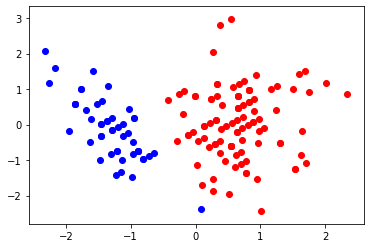

In [5]:
#stampa
%matplotlib inline
import matplotlib.pyplot as plt


def gr_dataset(): 
    for lab, col in zip((1, 0),
                        ('blue', 'red')):
        plt.scatter(iris_values_2d[y==lab, 0],
                    iris_values_2d[y==lab, 1],
                    label=lab,
                    c=col)

gr_dataset()

In [64]:
def gr_membership_contour(model, X, Y):
    res = []
    for x, y in zip(X, Y):
        pred, _, _ = model.predict(x)
        res.append(pred)
    zs = np.array(res)
    Z = zs.reshape(X.shape)
    Y = Y.reshape(X.shape)
    print(X.ndim, Y.ndim, Z.ndim)
    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.1, .3, .5, .95), colors='k')
    plt.clabel(membership_contour, inline=1)

In [62]:
def gr_membership_contour2():
    x = np.arange(-4, 4, .1)
    y = np.arange(-4, 4, .1)
    X, Y = np.meshgrid(x, y)
    zs = np.array([estimated_membership((x, y))
                   for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    membership_contour = plt.contour(X, Y, Z,
                                     levels=(.1, .3, .5, .95), colors='k')
    plt.clabel(membership_contour, inline=1)

In [54]:
X = xTest
res = []
for x in X:
    pred, _, _ = model.predict(x)
    res.append(pred)
res = np.array(res)
res

array([[0.9925, 0.9875],
       [0.9975, 0.9725],
       [0.9975, 0.9725],
       [0.9975, 0.975 ],
       [0.9775, 0.9975],
       [1.    , 0.975 ],
       [1.    , 0.985 ],
       [0.995 , 0.965 ],
       [0.9975, 0.975 ],
       [0.975 , 0.9975],
       [1.    , 0.975 ],
       [0.9975, 0.975 ],
       [0.975 , 0.995 ],
       [0.9775, 1.    ],
       [0.975 , 0.995 ],
       [0.99  , 1.    ],
       [1.    , 0.975 ],
       [0.995 , 0.9675],
       [1.    , 0.975 ],
       [1.    , 0.9775],
       [1.    , 0.975 ],
       [0.9925, 0.9725],
       [0.9975, 0.975 ],
       [0.9975, 0.975 ],
       [0.9775, 0.9975],
       [0.9925, 0.975 ],
       [0.9875, 0.9825],
       [1.    , 0.9725],
       [0.9975, 0.9825],
       [1.    , 0.97  ],
       [1.    , 0.975 ],
       [0.9975, 0.975 ],
       [0.985 , 0.9975],
       [0.9975, 0.975 ],
       [0.995 , 0.965 ],
       [0.9975, 0.97  ],
       [0.975 , 1.    ],
       [0.985 , 0.9975]])

In [16]:
a = np.arange (0.0, 1.1, 0.1)
parameters = {'sensitivity': a, 'exp_bound': a }
parameters['exp_bound']

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y)
model = FuzzyMMC()

In [18]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameters, cv = 5)

In [19]:
clf.fit(xTrain, yTrain)

C:\Users\rita folisi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<fuzzy.FuzzyMMC object at 0x0000024C2DD15A08>,
             iid='warn', n_jobs=None,
             param_grid={'exp_bound': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'sensitivity': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
model = clf.best_estimator_

ValueError: cannot reshape array of size 38 into shape (38,2)

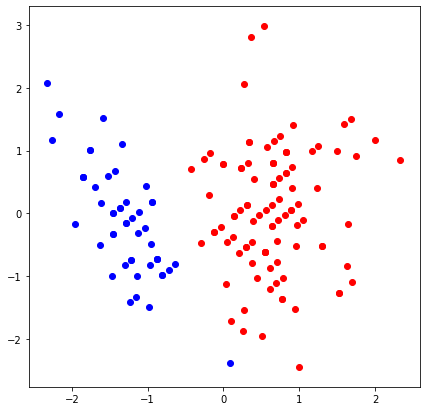

In [65]:
plt.figure(figsize=(7,7))
gr_dataset()
gr_membership_contour(model, xTest, yTest)
plt.show()